# Project 1

### Problem 1

In [3]:
# data = scale(get(load("Lab3.Rdata")) - 10)
data = get(load("Lab3.Rdata"))
data = apply(data - 10, 2, function(col) col / sd(col))

In [4]:
data[1:5,]

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,3.320701,-4.672019,-3.6207425,-1.8788372,-1.304469,-2.1400544,-0.6836783,-0.6329174,2.916898,6.858462,⋯,-1.2646257,-3.6788223,-4.064593,-4.204200,-4.653301,2.291804,-4.5613786,0.8238200,2.663034,-1.282643
NA06993,4.522049,-2.504244,-0.2989289,1.4740600,1.952473,-0.8951127,1.2726317,0.2504213,3.031755,6.379089,⋯,0.9805873,-1.6659186,-3.935630,-3.568862,-1.885880,3.073146,-0.8298840,2.7096547,2.178062,-1.270634
NA07022,3.593433,-2.993319,-1.1402403,-1.0598208,1.248440,-2.4596897,1.2115513,-0.7036789,3.121900,7.938343,⋯,-2.2887468,-0.8547229,-3.655642,-2.887934,-1.629679,2.061270,-1.6536221,0.9795550,2.414203,-2.635291
NA07034,4.043400,-2.163135,-1.6537376,0.2452835,1.688383,-0.9272713,1.6320421,0.5425016,2.458150,7.731027,⋯,-2.3846812,-0.9925057,-3.033247,-2.722733,-1.613975,1.517324,-2.3507371,-0.3230593,2.188321,-2.646971
NA07055,4.899260,-2.276058,0.1766910,0.5478394,1.323379,-2.1625483,0.3988189,0.8411762,1.783395,7.105700,⋯,-0.6617594,-1.2074156,-3.378331,-3.555149,-2.252320,2.230214,-0.9541902,1.5572120,1.979752,-1.028758


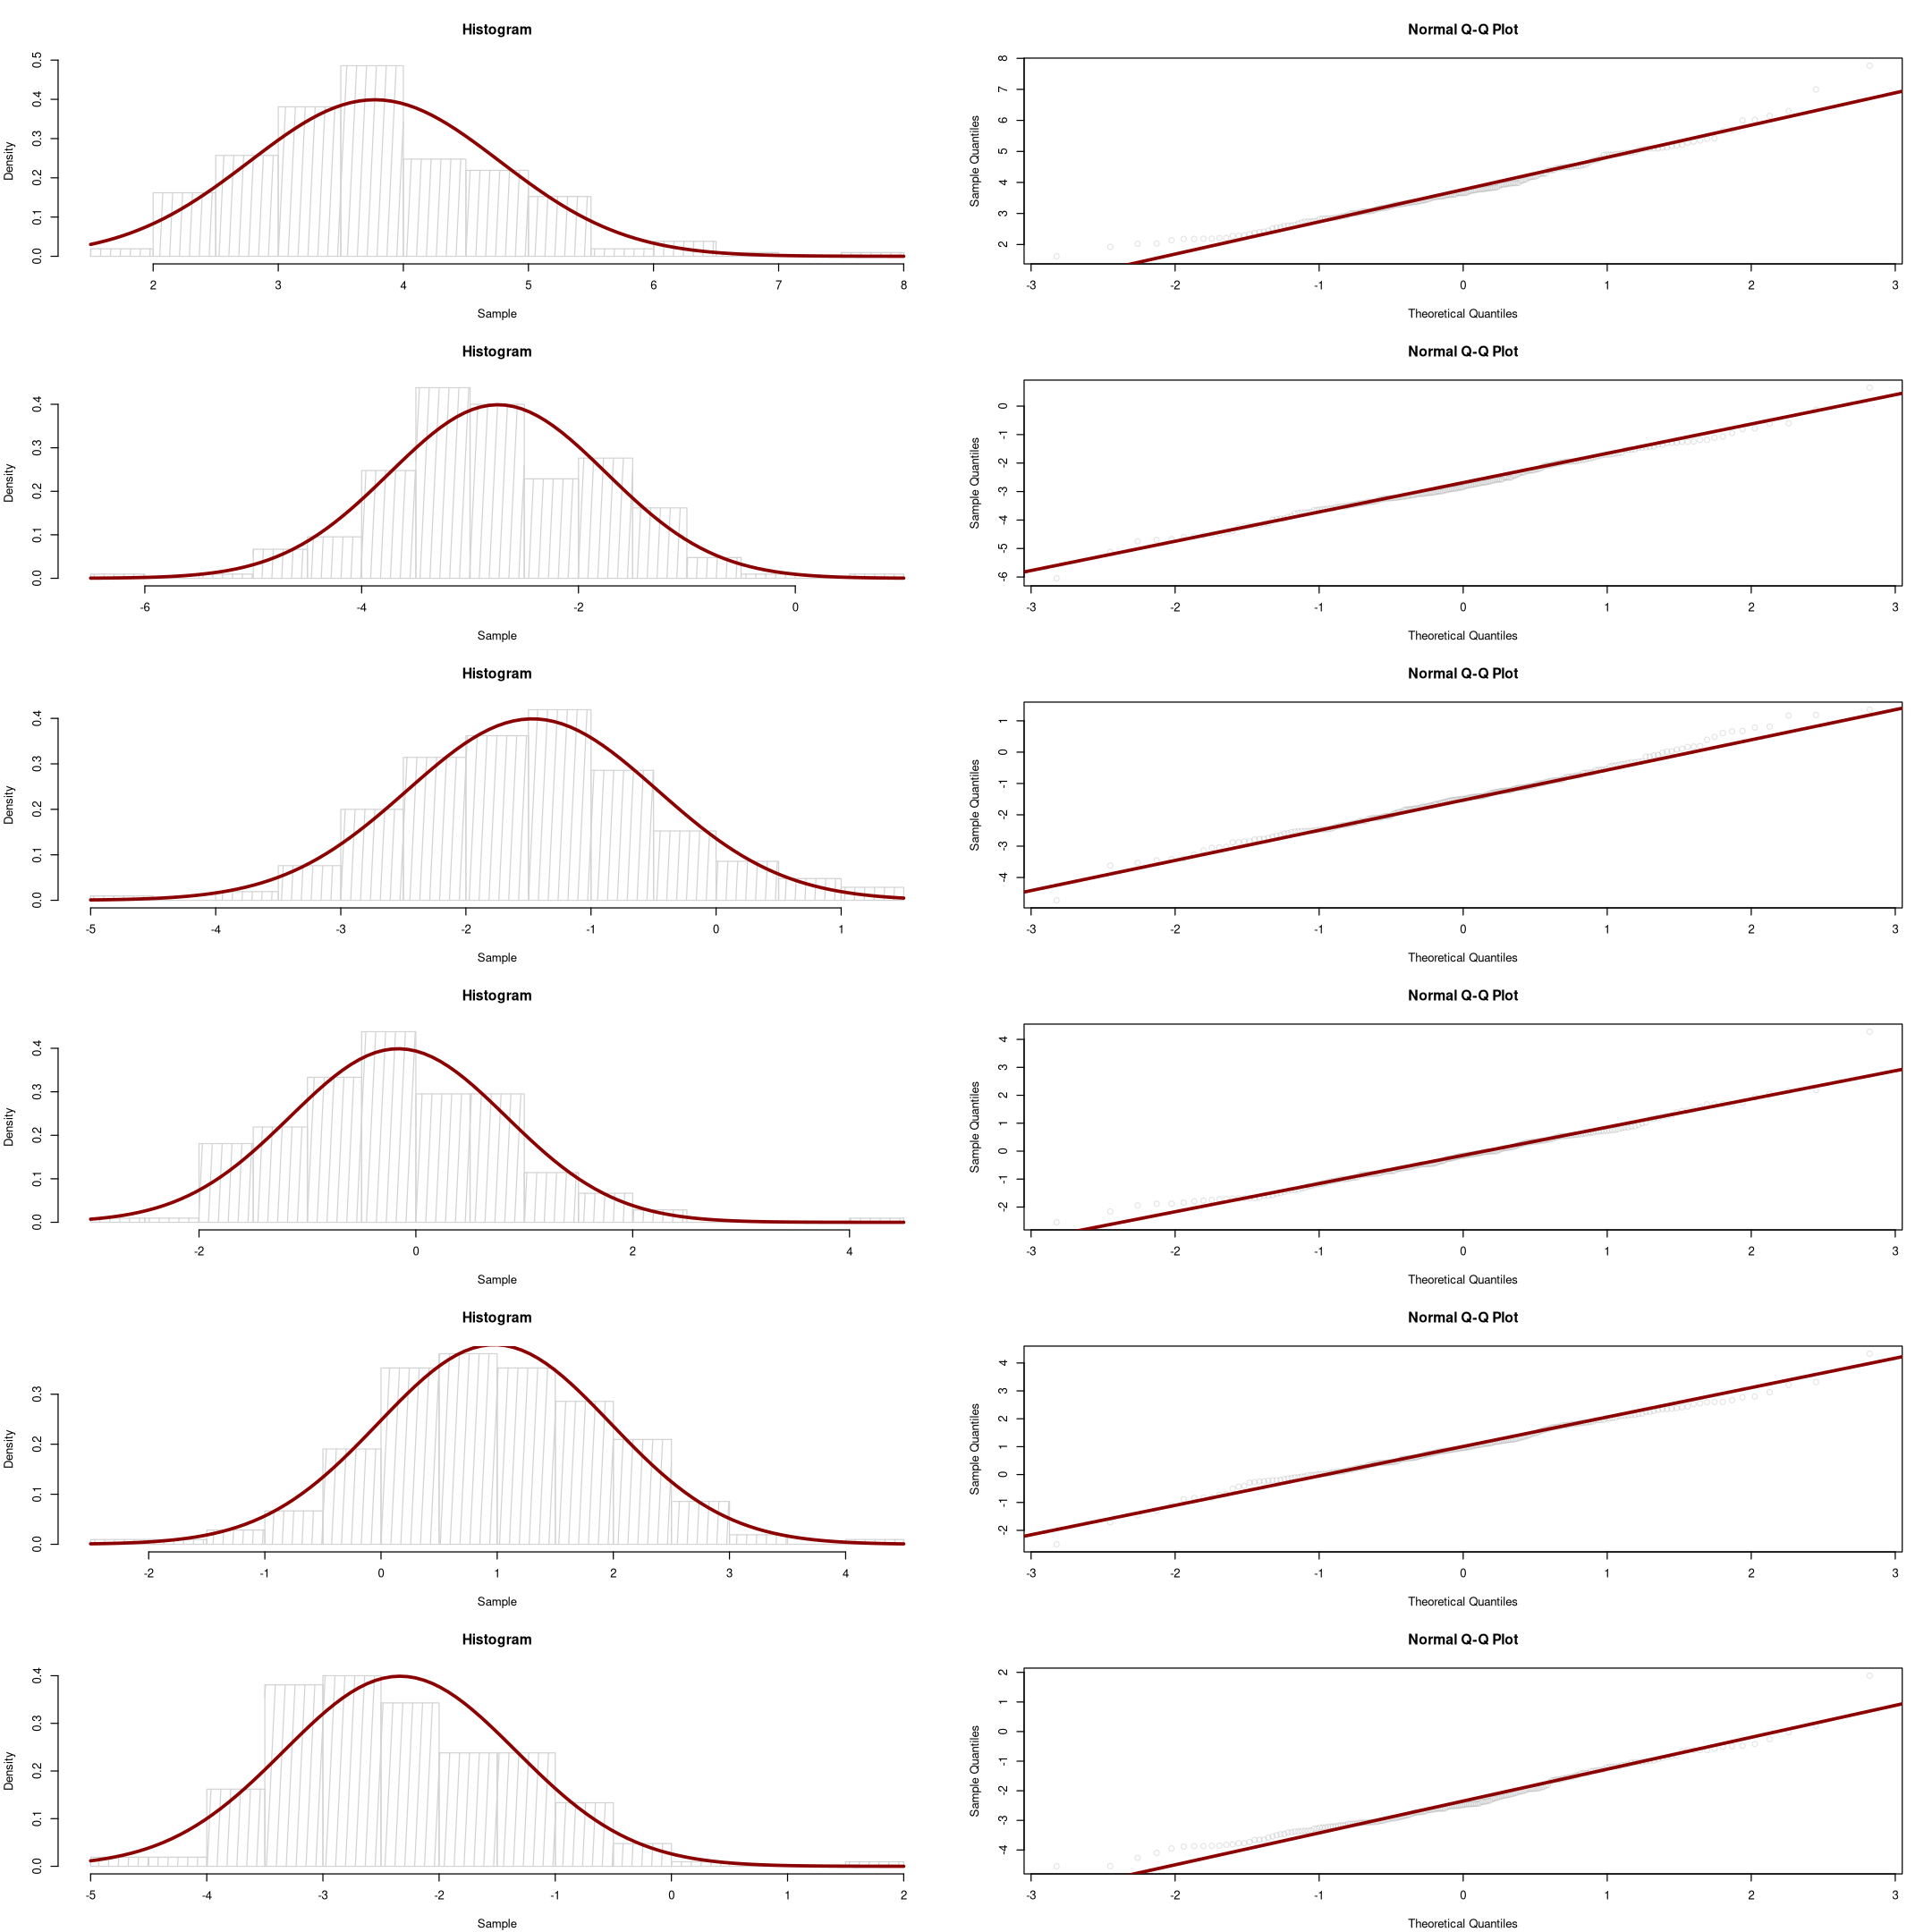

In [5]:
par(mfrow = c(6, 2), mar=c(4.1, 4.1, 4.1, 2.1))
options(repr.plot.width=18, repr.plot.height=18)

for (i in 1:6) {
	Sample = data[,i]
	hist(Sample, density=50, breaks=16, prob=TRUE, main="Histogram")
	curve(dnorm(x, mean=mean(Sample), sd=sqrt(var(Sample))), col="darkred", lwd=3, add=TRUE)

	qqnorm(Sample, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))
	qqline(Sample, col="darkred", lwd=3)
}

Data appears normally distributed and is standardized to have its standard deviation equal to one

In [6]:
first = data[1:5,]; first
µmle = as.matrix(as.numeric(colMeans(first)))
µ = as.matrix(as.numeric(colMeans(data[6:210,])))
# µ = as.matrix(as.numeric(colMeans(data)))

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,3.320701,-4.672019,-3.6207425,-1.8788372,-1.304469,-2.1400544,-0.6836783,-0.6329174,2.916898,6.858462,⋯,-1.2646257,-3.6788223,-4.064593,-4.204200,-4.653301,2.291804,-4.5613786,0.8238200,2.663034,-1.282643
NA06993,4.522049,-2.504244,-0.2989289,1.4740600,1.952473,-0.8951127,1.2726317,0.2504213,3.031755,6.379089,⋯,0.9805873,-1.6659186,-3.935630,-3.568862,-1.885880,3.073146,-0.8298840,2.7096547,2.178062,-1.270634
NA07022,3.593433,-2.993319,-1.1402403,-1.0598208,1.248440,-2.4596897,1.2115513,-0.7036789,3.121900,7.938343,⋯,-2.2887468,-0.8547229,-3.655642,-2.887934,-1.629679,2.061270,-1.6536221,0.9795550,2.414203,-2.635291
NA07034,4.043400,-2.163135,-1.6537376,0.2452835,1.688383,-0.9272713,1.6320421,0.5425016,2.458150,7.731027,⋯,-2.3846812,-0.9925057,-3.033247,-2.722733,-1.613975,1.517324,-2.3507371,-0.3230593,2.188321,-2.646971
NA07055,4.899260,-2.276058,0.1766910,0.5478394,1.323379,-2.1625483,0.3988189,0.8411762,1.783395,7.105700,⋯,-0.6617594,-1.2074156,-3.378331,-3.555149,-2.252320,2.230214,-0.9541902,1.5572120,1.979752,-1.028758


$\hat{\mu}_{JS} = \left( 1 - \frac{k-2}{\| \bar{x} \|^2} \right) \bar{x}$


In [20]:
xnorm = sum(µmle**2)
µjs.zero = (1 - (ncol(data) - 2) / xnorm) * µmle

$\hat{\mu}_{JS} = \mu_0 + \left( 1 - \frac{k-2}{\| \bar{x} - \mu_0 \|^2} \right) (\bar{x} - \mu_0)$


In [21]:
# should we use true mean here?
xnorm = sum((µmle - µ)**2)
µjs.mean = µ + (1 - (ncol(data) - 2) / xnorm) * (µmle - µ)

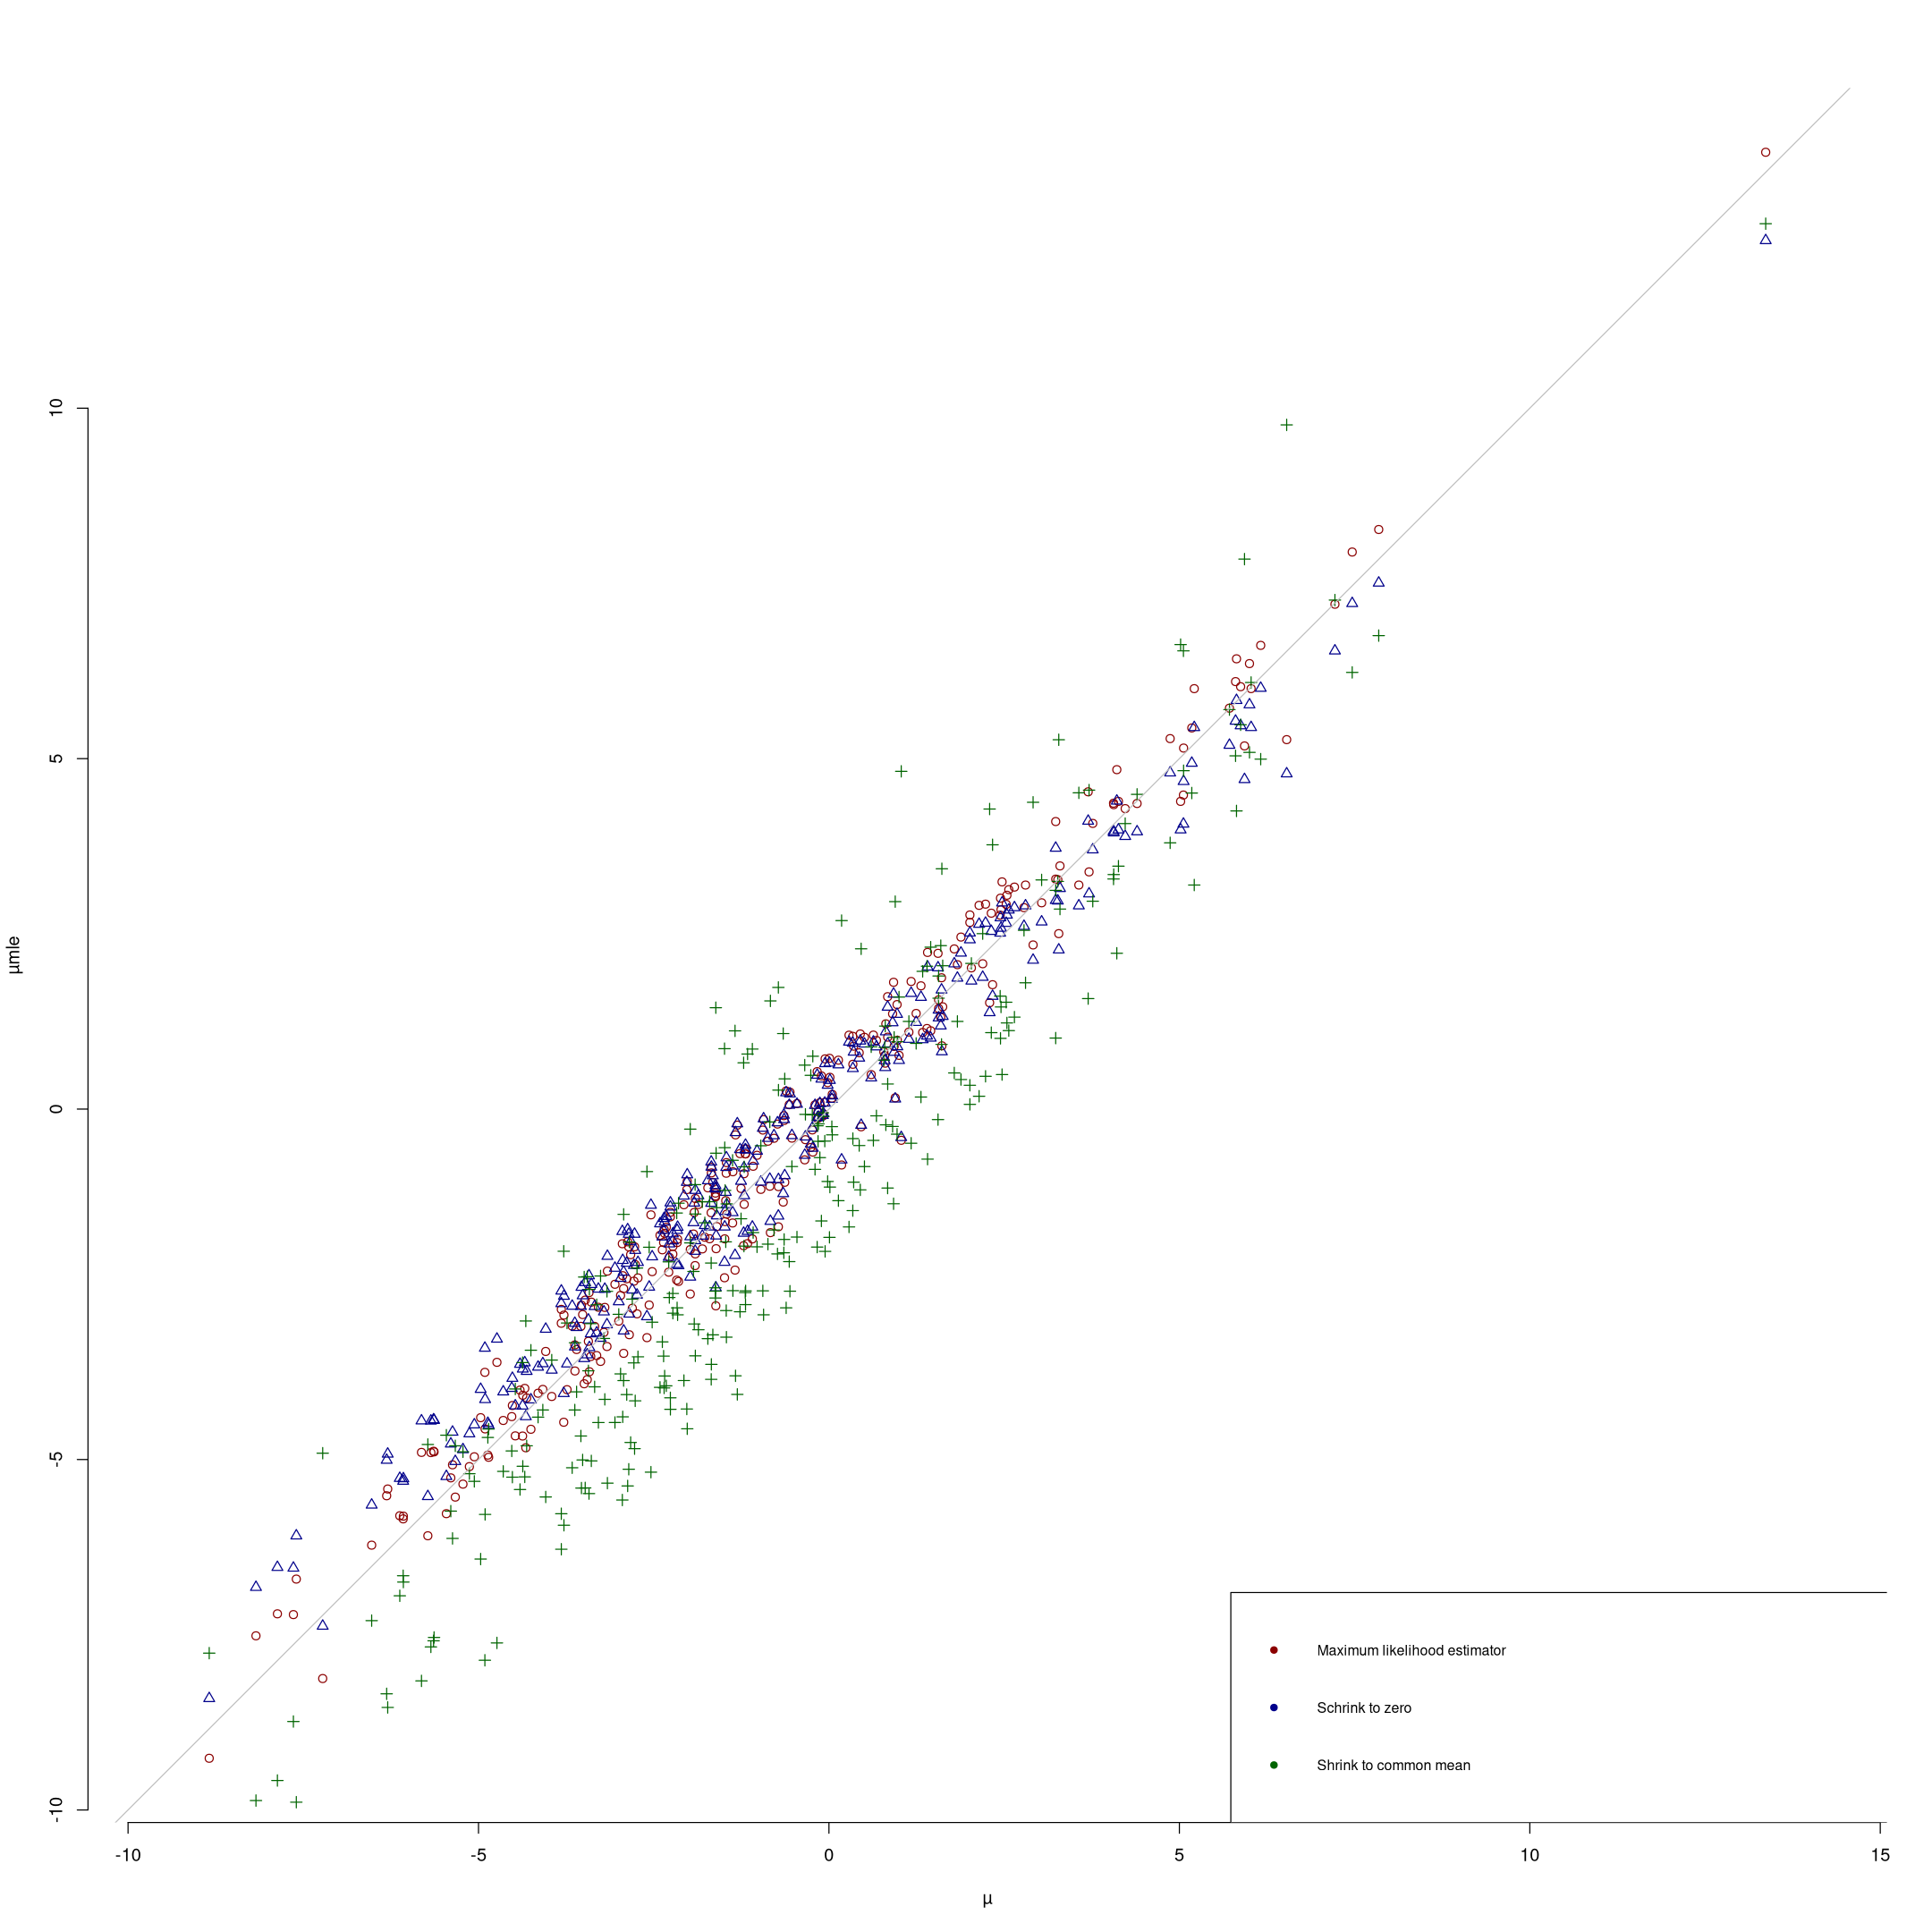

In [22]:
plot(µ, µmle, col = "darkred", asp = 1, frame = FALSE, pch=1)
points(µ, µjs.zero, col = "darkblue", pch=2)
points(µ, µjs.mean, col = "darkgreen", pch=3)
abline(0, 1, col = "gray")
legend(
	"bottomright",
	legend = c("Maximum likelihood estimator", "Schrink to zero", "Shrink to common mean"),
	col = c("darkred", "darkblue", "darkgreen"),
	pch = 19,
	cex = 0.8,
)

Mean sqared errors ???

In [23]:
sum((µ - µmle)**2)

[1] 83.61966

In [24]:
sum((µ - µjs.zero)**2)

[1] 113.1475

In [25]:
sum((µ - µjs.mean)**2)

[1] 549.6187

### Problem 2

In [31]:
X = matrix(data = rnorm(1000 * 950, 0, sqrt(1e-3)), nrow = 1000)

In [32]:
head(X)

-0.009483416,-0.036287401,0.0019812195,-0.002719774,0.02198976,-0.0004296467,0.006903915,-0.039522785,0.003688425,-0.0351996258,⋯,-0.091687100,-0.04761549,0.008977411,0.003397521,-0.016146508,-0.026876950,0.005394144,-0.009266561,0.0131906529,-0.02397967
0.027255890,0.034273768,-0.0162726347,0.001262680,0.02044232,-0.0438362903,0.015873244,0.008497708,0.022226674,-0.0232062562,⋯,0.008816686,0.01745835,-0.013589958,-0.012674794,-0.034729658,0.026094312,0.006529544,0.005727222,-0.0492999063,0.00274153
-0.004942922,-0.062303385,-0.0157171357,-0.012785667,0.01655808,0.0387868073,-0.015520323,-0.005066923,0.005484481,0.0013089359,⋯,0.030443623,-0.02008316,0.019525452,-0.045187049,0.052346709,-0.051516796,0.008971509,0.009838107,0.0111022807,-0.01405469
0.024977472,0.005138208,-0.0298530762,0.041679378,-0.04094931,-0.0143714651,-0.042753141,0.057125922,-0.053120618,-0.0053716659,⋯,0.020186114,0.06721646,-0.048606717,-0.007936390,-0.008962402,-0.014566823,-0.018022999,0.012434507,-0.0007721825,-0.02686947
0.099392287,0.001847353,0.0333516262,0.010296556,-0.02865592,-0.0017900023,0.008397646,-0.005682787,-0.052885395,0.0070228999,⋯,0.031050613,0.03754180,-0.033921159,0.015891600,0.005966994,0.002253791,-0.017136163,0.026543583,0.0372252576,0.05280050
0.062400198,0.017942668,0.0001878044,-0.004622803,0.01983960,-0.0175564645,0.006725043,0.049150624,-0.046947480,-0.0009415562,⋯,-0.024986686,-0.02652681,0.015947346,0.015460558,0.008731433,0.013173754,0.019189401,0.044253156,-0.0286992298,0.04927718
